# Relatório sobre atributos de personagens da Marvel

Clique [aqui](https://www.kaggle.com/spatika/marvel-comics-characters-stats-and-powers) para acessar o kaggle.

## Passo 1
Importar libs

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)

## Passo 2
Carregar csv

In [67]:
data = pd.read_csv('csv/marvel_demo_stats_powers.csv')

# Remoção de colunas não úteis para a análise dos dados
data = data.drop(columns=["Unnamed: 0", "ID"])

data

,Name,Alignment_x,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
2,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0,...,False,False,False,False,False,False,False,False,False,False
3,Absorbing Man,bad,Male,blue,Human,No Hair,Marvel Comics,-,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
4,Agent 13,good,Female,blue,-,Blond,Marvel Comics,-,173.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Agent Bob,good,Male,brown,Human,Brown,Marvel Comics,-,178.0,81.0,...,False,False,False,False,False,False,False,False,False,False
6,Agent Zero,good,Male,-,-,-,Marvel Comics,-,191.0,104.0,...,False,False,False,False,False,False,False,False,False,False
7,Air-Walker,bad,Male,blue,-,White,Marvel Comics,-,188.0,108.0,...,False,False,False,False,False,False,False,False,False,False
8,Ajax,bad,Male,brown,Cyborg,Black,Marvel Comics,-,193.0,90.0,...,False,False,False,False,False,False,False,False,False,False
9,Ammo,bad,Male,brown,Human,Black,Marvel Comics,-,188.0,101.0,...,False,False,False,False,False,False,False,False,False,False


## Passo 3
Organizar e limpar o dataset

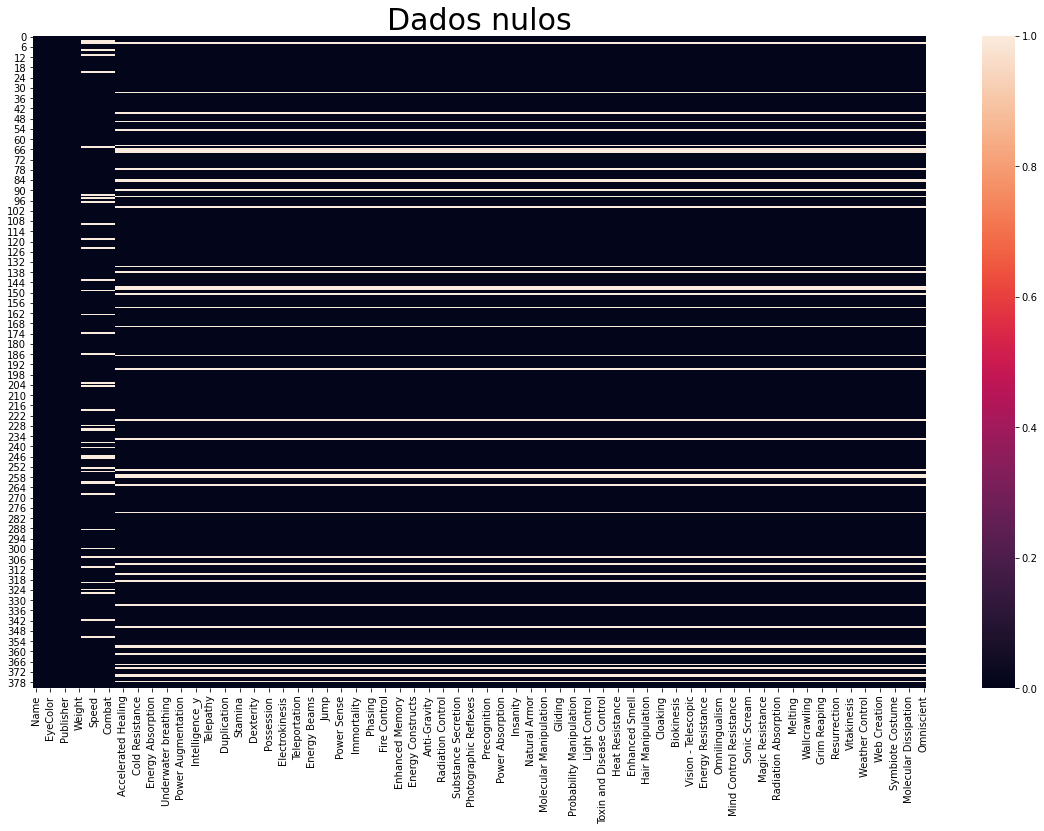

In [68]:
plt.figure(figsize=(20,12))
plt.title("Dados nulos", size=30)
sns.heatmap(data.isna());

In [69]:
data = data.dropna()
data.shape[0]

298

Removendo os dados nulos, ficamos com um total de 298 linhas para analizar.

## Passo 4
Analizar algumas informações

In [70]:
data.columns.values.tolist()

['Name',
 'Alignment_x',
 'Gender',
 'EyeColor',
 'Race',
 'HairColor',
 'Publisher',
 'SkinColor',
 'Height',
 'Weight',
 'Intelligence_x',
 'Strength',
 'Speed',
 'Durability_x',
 'Power',
 'Combat',
 'Total',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability_y',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence_y',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 

Dá pra notar que boa parte dessas colunas, tanto pelo nome quanto olhando na tabela, são valores booleanos, mas quando pegamos as informações delas, vemos que são tratadas como `object`.

In [71]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 381
Data columns (total 184 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    Name                          object 
 1    Alignment_x                   object 
 2    Gender                        object 
 3    EyeColor                      object 
 4    Race                          object 
 5    HairColor                     object 
 6    Publisher                     object 
 7    SkinColor                     object 
 8    Height                        float64
 9    Weight                        float64
 10   Intelligence_x                float64
 11   Strength                      float64
 12   Speed                         float64
 13   Durability_x                  float64
 14   Power                         float64
 15   Combat                        float64
 16   Total                         float64
 17   Agility                       object 
 18   Accelera

Vemos que desde Agility (17) até Omniscient (183) os valores são Boolean

In [72]:
booleans = np.arange(17, 184, 1)

data.iloc[:, booleans] = data.iloc[:, booleans].astype('bool')

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 381
Data columns (total 184 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    Name                          object 
 1    Alignment_x                   object 
 2    Gender                        object 
 3    EyeColor                      object 
 4    Race                          object 
 5    HairColor                     object 
 6    Publisher                     object 
 7    SkinColor                     object 
 8    Height                        float64
 9    Weight                        float64
 10   Intelligence_x                float64
 11   Strength                      float64
 12   Speed                         float64
 13   Durability_x                  float64
 14   Power                         float64
 15   Combat                        float64
 16   Total                         float64
 17   Agility                       bool   
 18   Accelera

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Agora podemos plotar algumas informações interessantes, como a quantos personagens cada habilidade tem.

In [73]:
number_power = data.iloc[:, booleans].sum().sort_values(ascending=False)
number_power

Super Strength                  176
Stamina                         131
Durability_y                    130
Super Speed                     117
Agility                         100
Flight                           98
Reflexes                         83
Energy Blasts                    81
Accelerated Healing              79
Telepathy                        49
Longevity                        48
Intelligence_y                   47
Invulnerability                  45
Enhanced Senses                  39
Force Fields                     38
Energy Absorption                36
Marksmanship                     36
Psionic Powers                   35
Natural Weapons                  34
Teleportation                    33
Stealth                          32
Telekinesis                      31
Immortality                      29
Toxin and Disease Resistance     29
Shapeshifting                    28
Weapon-based Powers              28
Size Changing                    26
Molecular Manipulation      

Vemos que alguns poderes, nenhum personagem possui, então podemos remover essas colunas do dataframe.

In [74]:
power_zero = number_power[-16:].keys()
data = data.drop(columns=power_zero)
booleans = booleans[:-16]
number_power = data.iloc[:, booleans].sum().sort_values(ascending=False)
number_power

Super Strength                  176
Stamina                         131
Durability_y                    130
Super Speed                     117
Agility                         100
Flight                           98
Reflexes                         83
Energy Blasts                    81
Accelerated Healing              79
Telepathy                        49
Longevity                        48
Intelligence_y                   47
Invulnerability                  45
Enhanced Senses                  39
Force Fields                     38
Marksmanship                     36
Energy Absorption                36
Psionic Powers                   35
Natural Weapons                  34
Teleportation                    33
Stealth                          32
Telekinesis                      31
Immortality                      29
Toxin and Disease Resistance     29
Shapeshifting                    28
Weapon-based Powers              28
Size Changing                    26
Animal Oriented Powers      

Super Strength                  176
Stamina                         131
Durability_y                    130
Super Speed                     117
Agility                         100
Flight                           98
Reflexes                         83
Energy Blasts                    81
Accelerated Healing              79
Telepathy                        49
Longevity                        48
Intelligence_y                   47
Invulnerability                  45
Enhanced Senses                  39
Force Fields                     38
Marksmanship                     36
Energy Absorption                36
Psionic Powers                   35
Natural Weapons                  34
Teleportation                    33
Stealth                          32
Telekinesis                      31
Toxin and Disease Resistance     29
Immortality                      29
Weapon-based Powers              28
Shapeshifting                    28
Size Changing                    26
Molecular Manipulation      

Male      67.114094
Female    28.523490
-          4.362416
Name: Gender, dtype: float64


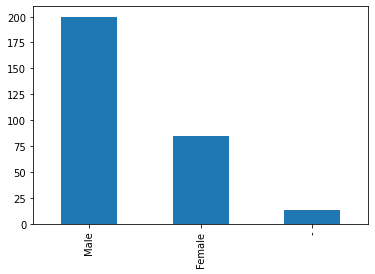

In [82]:
percentage = data['Gender'].value_counts()/data['Gender'].count() * 100;
print(percentage)

data['Gender'].value_counts().plot(kind='bar');

Pode-se ver que aproximadamente 67% dos personagens são homens, 28% são mulheres e 4% não possuem gênero. 